# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
colab_path_drive = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## Redes recurrentes y mapas auto-organizados

La red neuronal multicapa o red tipo perceptrón es la RNA mas utilizada debido a su sensilla arquitectura y la facilidad de entrenamiento. Sin embargo, estas redes presentan algunas limitaciones, como la carencia de memoria y la necesidad de datos de entrenamiento.

### DNN-H: Dynamic Neural Network-Hopfield

En sistemas de control en tiempo discreto o en predicción de series de tiempo se utilizan redes multicapa para producir modelos no lineales autoregresivos. En estas aplicaciones las redes multicapa se alimentan con muestras de la salida y la entrada retrazadas en el tiempo para crear un efecto dinámico.

Las redes neuronales también se pueden utilizar para aproximar la dinámica Entrada/Salida de sistemas dinámicos en tiempo continuo.

Las RNA **DNN-H (Dynamic Neural Network-Hopfield)** se utilizan para obtener una representación de estado sin unidades ocultas, pero el número de estados no es mínimo, es decir, las ecuaciones son simples pero el número de estados puede ser mayor al número de estados de la planta o sistema. Las redes de Hopfield se usan como sistemas de **Memoria asociativa** con unidades binarias. Están diseñadas para converger a un mínimo local, pero la convergencia a uno de los patrones almacenados no está garantizada. Las unidades de las redes Hopfield son binarias, es decir, solo tienen dos valores posibles para sus estados y el valor se determina si las unidades superan o no un determinado umbral (limitador duro). Los valores posibles pueden ser 1 ó -1, o bien 1 o 0. Así, las dos definiciones posibles para la unidad *i* de activación, $y_i$, son las siguientes:

$$y_{i}=\begin{cases}
\begin{array}{c}
1\quad\textrm{si}\;\sum_{j}w_{ij}s_{j}>\theta_{i}\\
-1\quad\textrm{en caso contrario}
\end{array}\end{cases}$$

$$y_{i}=\begin{cases}
\begin{array}{c}
1\quad\textrm{si}\;\sum_{j}w_{ij}s_{j}>\theta_{i}\\
0\quad\textrm{en caso contrario}
\end{array}\end{cases}$$

Donde:
- $w_{ij}$ es el valor del peso de la conexión de la unidad *j a la unidad i* (peso de conexión).
- $s_j$ es el estado de la unidad *j*.
- $\theta_{i}$ es el umbral de la unidad *i*.

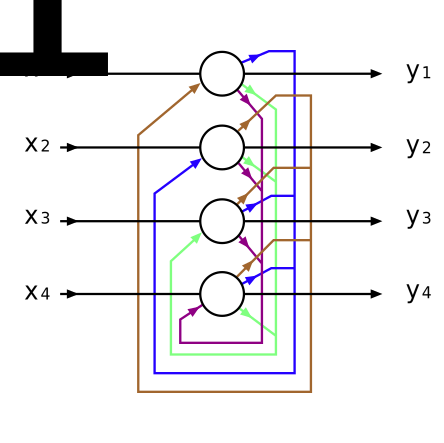

In [ ]:
from IPython.display import SVG
SVG(valid_path + 'din_fig1.svg')

Las conexiones en una red Hopfield suelen tener las siguientes restricciones:
- $w_{ii}$ = 0 para todo *i*, ninguna unidad tiene relación con ella misma.
- $w_{ij}$ = $w_{ji}$ para todo *i, j*. Conexiones simétricas.

Normalmente se requiere que los pesos sean simétricos para que la función de energía disminuya de forma monótona mientras sigue las reglas de activación, ya que si se utilizan pesos no simétricos la red podría mostrar un comportamiento periódico o caótico. Sin embargo, Hopfield consideró que este comportamiento caótico se limita a zonas relativamente pequeñas del espacio de fases, no influyendo en la capacidad de la red para actuar como contenido direccionable en el sistema de memoria asociativa.

Las redes Hopfield poseen un valor escalar asociado a cada estado de la red, conocido como energía (*E*) de la red, donde: 

$$E=-\frac{1}{2}\sum_{i,j}w_{ij}s_{i}s_{j}+\sum_{i}\theta_{i}s_{i}$$

Este valor se denomina energía, porque la definición asegura que si las unidades son elegidas al azar para actualizar sus valores de activación, la red convergerá a estados que son mínimos locales de la función de energía (que se considera una función de Lyapunov). Así, si un estado es un mínimo local en la función de energía será un estado estable de la red. Hay que tener en cuenta que esta función de energía pertenece a una clase general de modelos en física, denominados Modelos de Ising, los cuales a su vez son un caso particular de las redes de Markov, donde la medida de probabilidad asociada, llamada medida de Gibbs, tiene la propiedad de Márkov.

### Entrenamiento de la red Hopfield

La red Hopfield puede aprender/memorizar patrones y recordar/recuperar los patrones cuando la red se alimenta de estos con ruidos.

El entrenamiento de una red de Hopfield consiste en reducir la energía de los estados que la red debe *recordar*. Esto convierte a la red en un sistema de **memoria direccionable**, es decir, la red **recordará un estado si se le da solo parte de dicho estado**. Esto la hace útil para recuperar una entrada distorsionada usando un estado de la red obtenido durante el entrenamiento, y que es más similar al estado obtenido con la entrada actual. Esto se llama **memoria asociativa**, ya que recupera la memoria sobre la base de la similitud. Por ejemplo, si entrenamos una red Hopfield con cinco unidades para que el estado (1, 0, 1, 0, 1) sea un mínimo de energía, y le damos a la red el estado (1, 0, 0, 0, 1) esta convergerá a (1, 0, 1, 0, 1). Así, la red estará adecuadamente capacitada cuando la energía de los estados que la red debe recordar son mínimos locales.

## Taller

Memorizar el patrón (en blanco y negro) de una fotografia nítida del rostro de una persona a fin de que pueda identificar a la persona posteriormente a partir de la misma imagen pero distorsionada.

### Solución

Se crean dos carpetas para almacenar imagenes, una para las imagenes de entrenamiento (*train_pics*) y otra para las imagenes de prueba (*test_pics*). En la primera carpeta se colocan las imagenes de referencia a memorizar, en la segunda se colocan las mismas imagenes pero distorsionadas. Con respecto al código:
- Theta es el umbral de la activación neuronal.
- Time es un parámetro que indica los pasos para recordar las imágenes aprendidas. A medida que aumenta el número de pasos, la imagen recordada es más precisa.
- size es el tamaño de la imagen en píxeles. Si se colocan fotos con diferentes tamaños, el código las redimensiona.
- threshold es el umbral de corte para binarizar 1 byte de brillo (0 a 255).
- current_path es la ruta actual de la carpeta de trabajo.

Primero hacemos manipulación de imagen y creamos la estructura de la red Hopfield:

In [ ]:
import numpy as np
import random
from PIL import Image
import os
import re

# Convertir la matriz en un vector
def mat2vec(x):
    m = x.shape[0]*x.shape[1]
    tmp1 = np.zeros(m)

    c = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp1[c] = x[i,j]
            c +=1
    return tmp1

# Creación de una matriz de pesos para una sola imagen
def create_W(x):
    if len(x.shape) != 1:
        print("La entrada no es un vector!")
        return
    else:
        w = np.zeros([len(x),len(x)])
        for i in range(len(x)):
            for j in range(i,len(x)):
                if i == j:
                    w[i,j] = 0
                else:
                    w[i,j] = x[i]*x[j]
                    w[j,i] = w[i,j]
    return w

# Leer el archivo de imagen y convertirlo en una matriz Numpy
def readImg2array(file,size, threshold= 127):
    pilIN = Image.open(file).convert(mode="L")
    pilIN= pilIN.resize(size)
    imgArray = np.asarray(pilIN,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float)
    x[imgArray > threshold] = 1
    x[x==0] = -1
    return x

# Convertir una matriz Numpy a un archivo de imagen como Jpeg
def array2img(data, outFile = None):

    #los datos son 1 o -1 en la matriz
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

# Update
def update(w,y_vec,theta=0.5,time=100):
    for s in range(time):
        m = len(y_vec)
        i = random.randint(0,m-1)
        u = np.dot(w[i][:],y_vec) - theta

        if u > 0:
            y_vec[i] = 1
        elif u < 0:
            y_vec[i] = -1

    return y_vec

# Lo siguiente es el proceso de entrenamiento!!!!
#Ajuste inicial
def hopfield(train_files, test_files,theta=0.5, time=1000, size=(100,100),threshold=60, current_path=None):

    #Leer la imagen y convertirla en una matriz Numpy
    print("Importando imagenes y creando la matriz de pesos...")

    #num_files es el número de archivos
    num_files = 0
    for path in train_files:
        print(path)
        x = readImg2array(file=path,size=size,threshold=threshold)
        x_vec = mat2vec(x)
        print(len(x_vec))
        if num_files == 0:
            w = create_W(x_vec)
            num_files = 1
        else:
            tmp_w = create_W(x_vec)
            w = w + tmp_w
            num_files +=1

    print("¡La matriz de peso está lista!!")

    #Importar datos de prueba
    counter = 0
    for path in test_files:
        y = readImg2array(file=path,size=size,threshold=threshold)
        oshape = y.shape
        y_img = array2img(y)
        y_img.show()
        print("Datos de prueba importados")

        y_vec = mat2vec(y)
        print("Actualizando...")
        y_vec_after = update(w=w,y_vec=y_vec,theta=theta,time=time)
        y_vec_after = y_vec_after.reshape(oshape)
        if current_path is not None:
            outfile = current_path+"/after_"+str(counter)+".jpeg"
            array2img(y_vec_after,outFile=outfile)
        else:
            after_img = array2img(y_vec_after,outFile=None)
            after_img.show()
        counter +=1

En primer lugar, se crea una lista de la ruta de los archivos de entrada (para memorizar):

In [ ]:
#current_path = os.getcwd() # My HDD
current_path = colab_path_drive # Use for Colab
train_paths = []
path = current_path+"/train_pics/"
for i in os.listdir(path):
    if re.match(r'[0-9a-zA-Z-]*.jp[e]*g',i):
        train_paths.append(path+i)

En segundo lugar, se crea una lista de rutas de los archivos alterados (para identificar):

In [ ]:
test_paths = []
path = current_path+"/test_pics/"
for i in os.listdir(path):
    if re.match(r'[0-9a-zA-Z-_]*.jp[e]*g',i):
        test_paths.append(path+i)

Ahora memorizamos la imagen y le presentamos la imagen distorsionada para que la identifique:

In [ ]:
hopfield(train_files=train_paths, test_files=test_paths, theta=0.5,time=20000,size=(100,100),threshold=60, current_path = current_path)

Importando imagenes y creando la matriz de pesos...
/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks//train_pics/otra5.jpg
10000
/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks//train_pics/otra6.jpg
10000
¡La matriz de peso está lista!!
Datos de prueba importados
Actualizando...


En la carpeta raiz queda almacenada la imagen patron identificada, que en este caso corresponde a la única utilizada para memorizar. Evaluar el desempeño de la red con diferente cantidad de imagenes a memorizar (de 2 a 10 imagenes diferentes) y diferentes pasos para recordar (Time).

### Red de Kohonen

Un mapa auto-organizado (Self-Organizing Map - SOM) o mapa auto-organizado de características (SOFM) es un tipo de RNA que es entrenada usando aprendizaje **no supervisado** para producir una representación discreta del espacio de las muestras de entrada, llamado mapa. Los SOMs son adecuados para la visualización de datos de alta dimensión.

Los mapas auto-organizados son diferentes de otras RNA en el sentido que estos usan una función de vecindad para preservar las propiedades topológicas del espacio de entrada.

In [4]:
import numpy as np
from random import randint
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.close('all')

class SOM:
        
        """
        La class SOM toma datos de entrada de forma particular:
                [N,F]
        Donde N denota el número de objetos de datos que tiene y F denota el número 
        de características por objeto. Tenga en cuenta que F debe permanecer constante 
        en todos los objetos de datos, pero puede tener cualquier tamaño finito.
                
        La ejecución del algoritmo en su forma más simple se verá de la siguiente manera:
        
        SOM.generate_SOM(som_maker,x_size=50,y_size=75,your_data=train_data,initial_radius=100,number_of_iterations=100,initial_learning_rate=0.1)
        
        Donde cada variable tiene la siguiente propiedad:
                x_size: Longitud de SOM en dimensión x
                y_size: Longitud de SOM en dimensión y
                your_data: Datos de entrenamiento que se presentan al algoritmo con la forma [N,F]
                initial_radius: Radio de influencia del nodo en el epoch 1 de la fase de entrenamiento
                number_of_iterations: number of epochs during the training phase
                initial_learning_rate: hyperparameter for tuning the intensity of node alteration during training
        """

        def Kohonen_Layer(self,x_size,y_size,your_data):
                k_layer = np.random.uniform(your_data.min(),your_data.max(),(x_size,y_size,your_data.shape[-1]))
                return k_layer
        
        def BMU_node(self,k_layer,data_array):
                flat_w = np.vstack(np.copy(k_layer))
                BMU_val = np.linalg.norm(data_array-flat_w,axis=1).argmin()
                BMU = [int(np.floor(BMU_val/float(k_layer.shape[1]))),int(BMU_val-(np.floor((BMU_val/float(k_layer.shape[1])))*k_layer.shape[1]))]
                return BMU
        
        def lambda_function(self,initial_radius,number_of_iterations):
                return number_of_iterations/np.log(initial_radius)
                
        def radial_decay_function(self,time_step,lambda_value,initial_radius):
                return initial_radius*np.exp(-time_step/lambda_value)
        
        def learning_rate(self,initial_learning_rate,time_step,lambda_value):
                return initial_learning_rate*np.exp(-time_step/lambda_value)
        
        def node_influence(self,node_distances,radius):
                return np.exp((-(node_distances**2))/(2*(radius**2)))
        
        def weight_update(self,k_layer,theta,L,data,weights,weight_rows,weight_cols):
                k_layer[weight_rows,weight_cols] += (theta*L*(data-weights).T).T
                return k_layer
               
        def generate_SOM(self,x_size,y_size,your_data,initial_radius,number_of_iterations,initial_learning_rate): 
                
                self.x_size = x_size
                self.y_size = y_size
                self.your_data = your_data
                self.initial_radius = initial_radius
                self.number_of_iterations = number_of_iterations
                self.initial_learning_rate = initial_learning_rate
                
                k_layer = self.Kohonen_Layer(x_size,y_size,your_data)
                data_length = np.arange(0,your_data.shape[0]-1,1)
                bmu_list = []
                cols_list = []
                rows_list = []
                for i in range(int(number_of_iterations)):
                        print('ITERATION ',str(i), ' OF ', str(number_of_iterations))
                        random.shuffle(data_length)
                        for j in tqdm(range(len(data_length))):
                                data_array = your_data[data_length[j]]
                                lambda_value = self.lambda_function(initial_radius,number_of_iterations)
                                radius = self.radial_decay_function(i,lambda_value,initial_radius)                
                                BMU = self.BMU_node(k_layer,data_array)
                                bmu_list.append(BMU)
                                indices = np.indices((k_layer.shape[0],k_layer.shape[1])).reshape(2, -1).T
                                nodes_in_r = indices[np.where(np.linalg.norm(BMU-indices,axis=1)<radius)[0]]
                                node_dists = np.linalg.norm(nodes_in_r-BMU,axis=1)
                                rows = nodes_in_r[:,0]
                                cols = nodes_in_r[:,1]
                                cols_list.append(cols)
                                rows_list.append(rows)
                                node_values = k_layer[rows,cols]
                                theta = self.node_influence(node_dists,radius)
                                learn_rate = self.learning_rate(initial_learning_rate,i,lambda_value)
                                k_layer = self.weight_update(k_layer,theta,learn_rate,data_array,node_values,rows,cols)
                return k_layer
        
        def evaluate(self, test_data,k_layer):
                
                self.k_layer = k_layer
                self.test_data = test_data
                
                cols = []
                rows = []
                for i in range(test_data.shape[0]):
                        bmu = self.BMU_node(k_layer,test_data[i])
                        cols.append(bmu[0])
                        rows.append(bmu[1])
                return np.vstack([np.hstack(np.array(cols)), np.hstack(np.array(rows))])

ITERATION  0  OF  100


100%|██████████| 11/11 [00:00<00:00, 426.95it/s]


ITERATION  1  OF  100


100%|██████████| 11/11 [00:00<00:00, 403.86it/s]


ITERATION  2  OF  100


100%|██████████| 11/11 [00:00<00:00, 335.00it/s]


ITERATION  3  OF  100


100%|██████████| 11/11 [00:00<00:00, 341.29it/s]


ITERATION  4  OF  100


100%|██████████| 11/11 [00:00<00:00, 309.70it/s]


ITERATION  5  OF  100


100%|██████████| 11/11 [00:00<00:00, 402.45it/s]


ITERATION  6  OF  100


100%|██████████| 11/11 [00:00<00:00, 337.09it/s]


ITERATION  7  OF  100


100%|██████████| 11/11 [00:00<00:00, 316.71it/s]


ITERATION  8  OF  100


100%|██████████| 11/11 [00:00<00:00, 397.74it/s]


ITERATION  9  OF  100


100%|██████████| 11/11 [00:00<00:00, 393.82it/s]


ITERATION  10  OF  100


100%|██████████| 11/11 [00:00<00:00, 308.96it/s]


ITERATION  11  OF  100


100%|██████████| 11/11 [00:00<00:00, 334.46it/s]


ITERATION  12  OF  100


100%|██████████| 11/11 [00:00<00:00, 389.40it/s]


ITERATION  13  OF  100


100%|██████████| 11/11 [00:00<00:00, 404.94it/s]


ITERATION  14  OF  100


100%|██████████| 11/11 [00:00<00:00, 352.72it/s]


ITERATION  15  OF  100


100%|██████████| 11/11 [00:00<00:00, 339.04it/s]


ITERATION  16  OF  100


100%|██████████| 11/11 [00:00<00:00, 280.28it/s]


ITERATION  17  OF  100


100%|██████████| 11/11 [00:00<00:00, 384.80it/s]


ITERATION  18  OF  100


100%|██████████| 11/11 [00:00<00:00, 424.79it/s]


ITERATION  19  OF  100


100%|██████████| 11/11 [00:00<00:00, 449.35it/s]


ITERATION  20  OF  100


100%|██████████| 11/11 [00:00<00:00, 586.88it/s]


ITERATION  21  OF  100


100%|██████████| 11/11 [00:00<00:00, 547.33it/s]


ITERATION  22  OF  100


100%|██████████| 11/11 [00:00<00:00, 570.37it/s]


ITERATION  23  OF  100


100%|██████████| 11/11 [00:00<00:00, 626.91it/s]


ITERATION  24  OF  100


100%|██████████| 11/11 [00:00<00:00, 591.20it/s]


ITERATION  25  OF  100


100%|██████████| 11/11 [00:00<00:00, 626.08it/s]


ITERATION  26  OF  100


100%|██████████| 11/11 [00:00<00:00, 629.98it/s]


ITERATION  27  OF  100


100%|██████████| 11/11 [00:00<00:00, 486.88it/s]


ITERATION  28  OF  100


100%|██████████| 11/11 [00:00<00:00, 605.23it/s]


ITERATION  29  OF  100


100%|██████████| 11/11 [00:00<00:00, 506.49it/s]


ITERATION  30  OF  100


100%|██████████| 11/11 [00:00<00:00, 552.82it/s]


ITERATION  31  OF  100


100%|██████████| 11/11 [00:00<00:00, 538.30it/s]


ITERATION  32  OF  100


100%|██████████| 11/11 [00:00<00:00, 510.28it/s]


ITERATION  33  OF  100


100%|██████████| 11/11 [00:00<00:00, 591.59it/s]


ITERATION  34  OF  100


100%|██████████| 11/11 [00:00<00:00, 486.52it/s]


ITERATION  35  OF  100


100%|██████████| 11/11 [00:00<00:00, 696.29it/s]


ITERATION  36  OF  100


100%|██████████| 11/11 [00:00<00:00, 497.95it/s]


ITERATION  37  OF  100


100%|██████████| 11/11 [00:00<00:00, 528.24it/s]


ITERATION  38  OF  100


100%|██████████| 11/11 [00:00<00:00, 755.43it/s]


ITERATION  39  OF  100


100%|██████████| 11/11 [00:00<00:00, 557.54it/s]


ITERATION  40  OF  100


100%|██████████| 11/11 [00:00<00:00, 703.25it/s]


ITERATION  41  OF  100


100%|██████████| 11/11 [00:00<00:00, 574.62it/s]


ITERATION  42  OF  100


100%|██████████| 11/11 [00:00<00:00, 647.17it/s]


ITERATION  43  OF  100


100%|██████████| 11/11 [00:00<00:00, 652.46it/s]


ITERATION  44  OF  100


100%|██████████| 11/11 [00:00<00:00, 669.48it/s]


ITERATION  45  OF  100


100%|██████████| 11/11 [00:00<00:00, 712.93it/s]


ITERATION  46  OF  100


100%|██████████| 11/11 [00:00<00:00, 736.56it/s]


ITERATION  47  OF  100


100%|██████████| 11/11 [00:00<00:00, 556.65it/s]


ITERATION  48  OF  100


100%|██████████| 11/11 [00:00<00:00, 794.83it/s]


ITERATION  49  OF  100


100%|██████████| 11/11 [00:00<00:00, 628.98it/s]


ITERATION  50  OF  100


100%|██████████| 11/11 [00:00<00:00, 587.75it/s]


ITERATION  51  OF  100


100%|██████████| 11/11 [00:00<00:00, 721.39it/s]


ITERATION  52  OF  100


100%|██████████| 11/11 [00:00<00:00, 941.64it/s]


ITERATION  53  OF  100


100%|██████████| 11/11 [00:00<00:00, 595.25it/s]


ITERATION  54  OF  100


100%|██████████| 11/11 [00:00<00:00, 475.33it/s]


ITERATION  55  OF  100


100%|██████████| 11/11 [00:00<00:00, 657.88it/s]


ITERATION  56  OF  100


100%|██████████| 11/11 [00:00<00:00, 372.61it/s]


ITERATION  57  OF  100


100%|██████████| 11/11 [00:00<00:00, 919.53it/s]


ITERATION  58  OF  100


100%|██████████| 11/11 [00:00<00:00, 733.88it/s]


ITERATION  59  OF  100


100%|██████████| 11/11 [00:00<00:00, 792.38it/s]


ITERATION  60  OF  100


100%|██████████| 11/11 [00:00<00:00, 603.14it/s]


ITERATION  61  OF  100


100%|██████████| 11/11 [00:00<00:00, 762.95it/s]


ITERATION  62  OF  100


100%|██████████| 11/11 [00:00<00:00, 714.86it/s]


ITERATION  63  OF  100


100%|██████████| 11/11 [00:00<00:00, 710.12it/s]


ITERATION  64  OF  100


100%|██████████| 11/11 [00:00<00:00, 1028.68it/s]


ITERATION  65  OF  100


100%|██████████| 11/11 [00:00<00:00, 959.14it/s]


ITERATION  66  OF  100


100%|██████████| 11/11 [00:00<00:00, 604.71it/s]


ITERATION  67  OF  100


100%|██████████| 11/11 [00:00<00:00, 605.48it/s]


ITERATION  68  OF  100


100%|██████████| 11/11 [00:00<00:00, 697.93it/s]


ITERATION  69  OF  100


100%|██████████| 11/11 [00:00<00:00, 759.16it/s]


ITERATION  70  OF  100


100%|██████████| 11/11 [00:00<00:00, 692.92it/s]


ITERATION  71  OF  100


100%|██████████| 11/11 [00:00<00:00, 743.28it/s]


ITERATION  72  OF  100


100%|██████████| 11/11 [00:00<00:00, 813.95it/s]


ITERATION  73  OF  100


100%|██████████| 11/11 [00:00<00:00, 716.94it/s]


ITERATION  74  OF  100


100%|██████████| 11/11 [00:00<00:00, 695.48it/s]


ITERATION  75  OF  100


100%|██████████| 11/11 [00:00<00:00, 724.02it/s]


ITERATION  76  OF  100


100%|██████████| 11/11 [00:00<00:00, 688.60it/s]


ITERATION  77  OF  100


100%|██████████| 11/11 [00:00<00:00, 657.32it/s]


ITERATION  78  OF  100


100%|██████████| 11/11 [00:00<00:00, 839.78it/s]


ITERATION  79  OF  100


100%|██████████| 11/11 [00:00<00:00, 1081.44it/s]


ITERATION  80  OF  100


100%|██████████| 11/11 [00:00<00:00, 748.90it/s]


ITERATION  81  OF  100


100%|██████████| 11/11 [00:00<00:00, 839.43it/s]


ITERATION  82  OF  100


100%|██████████| 11/11 [00:00<00:00, 851.09it/s]


ITERATION  83  OF  100


100%|██████████| 11/11 [00:00<00:00, 729.70it/s]


ITERATION  84  OF  100


100%|██████████| 11/11 [00:00<00:00, 602.36it/s]


ITERATION  85  OF  100


100%|██████████| 11/11 [00:00<00:00, 576.54it/s]


ITERATION  86  OF  100


100%|██████████| 11/11 [00:00<00:00, 534.03it/s]


ITERATION  87  OF  100


100%|██████████| 11/11 [00:00<00:00, 1020.78it/s]


ITERATION  88  OF  100


100%|██████████| 11/11 [00:00<00:00, 557.20it/s]


ITERATION  89  OF  100


100%|██████████| 11/11 [00:00<00:00, 815.13it/s]


ITERATION  90  OF  100


100%|██████████| 11/11 [00:00<00:00, 933.35it/s]


ITERATION  91  OF  100


100%|██████████| 11/11 [00:00<00:00, 1013.43it/s]


ITERATION  92  OF  100


100%|██████████| 11/11 [00:00<00:00, 876.54it/s]


ITERATION  93  OF  100


100%|██████████| 11/11 [00:00<00:00, 642.12it/s]


ITERATION  94  OF  100


100%|██████████| 11/11 [00:00<00:00, 708.14it/s]


ITERATION  95  OF  100


100%|██████████| 11/11 [00:00<00:00, 526.56it/s]


ITERATION  96  OF  100


100%|██████████| 11/11 [00:00<00:00, 547.03it/s]


ITERATION  97  OF  100


100%|██████████| 11/11 [00:00<00:00, 1060.31it/s]


ITERATION  98  OF  100


100%|██████████| 11/11 [00:00<00:00, 593.25it/s]


ITERATION  99  OF  100


100%|██████████| 100/100 [00:06<00:00, 14.52it/s]


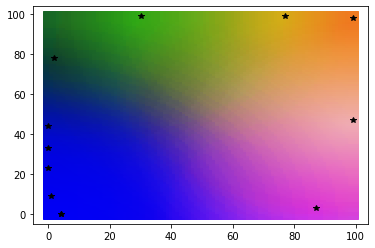

In [6]:
#Generate data
train_data = np.array([[0,0,1],[0,1,0],[1,0,0],[1,1,1],[0,0,0],[1,1,0],[1,0,1],
                       [0,0,1],[0,0,0.87],[0,0,0.91],[0,0,0.95],[0,0,0.75]]) 
          
#Instantiate the SOM classs
som_maker = SOM() 

#Train the SOM
som = SOM.generate_SOM(som_maker,x_size=100,y_size=100,your_data=train_data,initial_radius=200,
                       number_of_iterations=100,initial_learning_rate=0.1)       

#Evaluate data on the trained map
tested_data = SOM.evaluate(som_maker,train_data,som)

               
#Plot the evaluated data 
plt.figure()
for i in tqdm(range(som.shape[1])):
        for  j in range(som.shape[0]):
                plt.plot(j,i,'s',color=som[j,i],markersize=10.0,zorder=0)
plt.plot(tested_data[0],tested_data[1],'k*',zorder=1)